In [10]:
import numpy as np
# Assuming z_data is a NumPy array, you can visualize it
from PIL import Image
# Load the data from the "z" file
z_data = np.load('/tmp/openai-2023-11-17-20-03-52-937812/samples_10x64x64x3.npz')



image = Image.fromarray(z_data['arr_0'][0])

# Display the image using your system's default image viewer
image.show()

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


In [7]:
z_data['arr_0'].shape

(10, 64, 64, 3)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont


def visuals(dir):

    # Assuming you have a list of 10 NumPy arrays, each representing an image (replace this with your data)

    image = np.load(dir)
    print(len(image['arr_0']))
    keys = image.files
    image_data_list = image[keys[0]]
    captions = image[keys[1]]
    captions = [str(captions[i]) for i in range(captions.shape[0])]

    # Create a list to store PIL Images

    image_pil_list = [Image.fromarray(image_data) for image_data in image_data_list]

 

    # Calculate the total width and height for the final image
    total_width = sum(image.width for image in image_pil_list)
    max_height = max(image.height for image in image_pil_list)
    # Create a new image with the calculated dimensions

    combined_image = Image.new('RGB', (total_width, max_height))
    font = ImageFont.load_default()
    text_color = (255, 255, 255)
    draw = ImageDraw.Draw(combined_image)
    # Paste each image into the new image side by side with captions
    x_offset = 0

    for image, caption in zip(image_pil_list, captions):
        combined_image.paste(image, (x_offset, 0))
        text_height = max_height + 10  # Separate variable for text height
        draw.text((x_offset, text_height), caption, font=font, fill=text_color)
        x_offset += image.width
    combined_image.save('./visuals.png')
    display(combined_image)

 


In [47]:
def visuals(dir):
    # Assuming you have a list of 10 NumPy arrays, each representing an image (replace this with your data)
    image = np.load(dir)
    print(len(image['arr_0']))
    keys = image.files
    image_data_list = image[keys[0]]
    captions = image[keys[1]]
    captions = [str(captions[i]) for i in range(captions.shape[0])]

    # Create a list to store PIL Images
    image_pil_list = [Image.fromarray(image_data) for image_data in image_data_list]

    # Define the number of images per row
    images_per_row = 10

    # Calculate the total number of rows needed
    num_rows = (len(image_pil_list) + images_per_row - 1) // images_per_row

    # Calculate the total width and height for the final image
    total_width = sum(image.width for image in image_pil_list[:images_per_row])
    max_height = max(image.height for image in image_pil_list) * num_rows

    # Create a new image with the calculated dimensions
    combined_image = Image.new('RGB', (total_width, max_height))
    font = ImageFont.load_default()
    text_color = (255, 255, 255)
    draw = ImageDraw.Draw(combined_image)
    
    # Paste each image into the new image with captions
    x_offset = 0
    y_offset = 0
    
    for image, caption in zip(image_pil_list, captions):
        combined_image.paste(image, (x_offset, y_offset))
        draw.text((x_offset, y_offset + image.height), caption, font=font, fill=text_color)
        
        # Update offsets for the next image
        x_offset += image.width
        if x_offset >= total_width:
            x_offset = 0
            y_offset += image.height

    combined_image.save('./visuals.png')
    display(combined_image)

In [74]:
import os
import glob

def visuals_from_directory(directory):
    # Get a list of all JPG files in the directory
    jpg_files = glob.glob(os.path.join(directory, "*.jpg"))[:128]
    
    # Load the images and create captions (using file names)
    image_pil_list = []
    captions = []
    for jpg_file in jpg_files:
        image = Image.open(jpg_file)
        image_pil_list.append(image)
        captions.append(os.path.basename(jpg_file))

    # Define the number of images per row
    images_per_row = 10

    # Calculate the total number of rows needed
    num_rows = (len(image_pil_list) + images_per_row - 1) // images_per_row

    # Calculate the total width and height for the final image
    total_width = sum(image.width for image in image_pil_list[:images_per_row])
    max_height = max(image.height for image in image_pil_list) * num_rows

    # Create a new image with the calculated dimensions
    combined_image = Image.new('RGB', (total_width, max_height))
    font = ImageFont.load_default()
    text_color = (255, 255, 255)
    draw = ImageDraw.Draw(combined_image)
    
    # Paste each image into the new image with captions
    x_offset = 0
    y_offset = 0
    
    for image, caption in zip(image_pil_list, captions):
        combined_image.paste(image, (x_offset, y_offset))
        draw.text((x_offset, y_offset + image.height), caption, font=font, fill=text_color)
        
        # Update offsets for the next image
        x_offset += image.width
        if x_offset >= total_width:
            x_offset = 0
            y_offset += image.height

    display(combined_image)

10


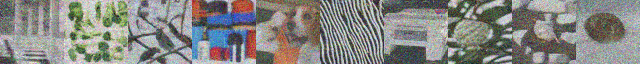

In [63]:
visuals('/tmp/openai-2023-11-17-20-03-52-937812/samples_10x64x64x3.npz'
)

20


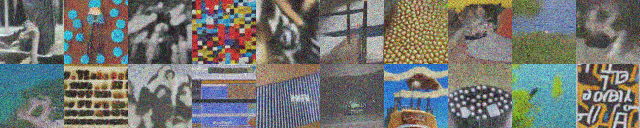

In [66]:
visuals('/home/cynthia0429/sc/guided-diffusion/samples/samples_20x64x64x3_m.npz'
)

In [73]:
visuals_from_directory_with_white_spacing('/mnt/pimed/results/GE_project/Cynthia/SCData/saved/')

OSError: [Errno 5] Input/output error: '/mnt/pimed/results/GE_project/Cynthia/SCData/saved/0.jpg'